In [1]:
import numpy as np
from matplotlib import pyplot
from matplotlib import rcParams
import matplotlib.cm as cm
%matplotlib inline
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
n = 192

Du, Dv, F, k = 0.00016, 0.00008, 0.035, 0.065 # Bacteria 1 

dh = 5/(n-1)

T = 8000

dt = .9 * dh**2 / (4*max(Du,Dv))

nt = int(T/dt)

In [3]:
uvinitial = np.load('./uvinitial.npz')
U = uvinitial['U']
V = uvinitial['V']

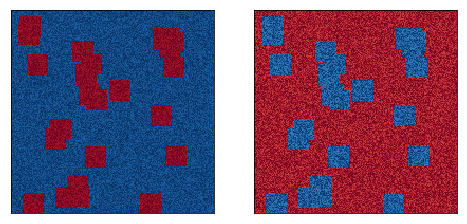

In [4]:
fig = pyplot.figure(figsize=(8,5))
pyplot.subplot(121)
pyplot.imshow(U, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);
pyplot.subplot(122)
pyplot.imshow(V, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);

In [5]:
def ftcs(u, v, n, Du, Dv, F, k, dh, T, dt, nt):
    
    u_n = np.zeros((nt,n,n))
    v_n = np.zeros((nt,n,n))
    
    for t in range(nt):
        u_n[t,1:-1,1:-1] = u[1:-1,1:-1] - dt*u[1:-1,1:-1]*v[1:-1,1:-1]**2 + dt*F*(1-u[1:-1,1:-1]) +\
                        dt*Du/dh**2*(u[2:,1:-1] + u[:-2,1:-1] + u[1:-1,2:] + u[1:-1,:-2]  - 4*u[1:-1,1:-1])
            
        v_n[t,1:-1,1:-1] = v[1:-1,1:-1] + dt*u[1:-1,1:-1]*v[1:-1,1:-1]**2 - dt*(F+k)*v[1:-1,1:-1] +\
                        dt*Dv/dh**2*(v[2:,1:-1] + v[:-2,1:-1] + v[1:-1,2:] + v[1:-1,:-2]  - 4*v[1:-1,1:-1])
        
                          
        
        # Enforce Neumann boundary conditions
        u_n[t,:,0] = u_n[t,:,1]   # left 
        u_n[t,:,-1] = u_n[t,:,-2] # right 
        u_n[t,0,:] = u_n[t,1,:]   # bottom
        u_n[t,-1,:] = u_n[t,-2,:] # top 
        
        v_n[t,:,0] = v_n[t,:,1]   # left 
        v_n[t,:,-1] = v_n[t,:,-2] # right 
        v_n[t,0,:] = v_n[t,1,:]   # bottom 
        v_n[t,-1,:] = v_n[t,-2,:] # top 
        
        
        u = u_n[t].copy()
        v = v_n[t].copy()
        
        
    return u_n, v_n

In [6]:
u_n, v_n = ftcs(U.copy(), V.copy(), n, Du, Dv, F, k, dh, T, dt, nt)

In [7]:
# the answers for the questions
print(u_n[-1,100,::40])

[ 0.92469521  0.85013834  0.66815621  0.90196481  0.9039502 ]


In [8]:
from matplotlib import animation
from IPython.display import HTML

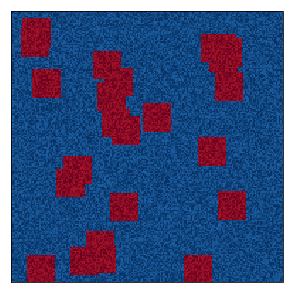

In [9]:
fig = pyplot.figure(figsize=(8,5));
pyplot.xticks([]), pyplot.yticks([]);
image = pyplot.imshow(U, cmap=cm.RdBu)

In [10]:
def animate(data):
    image.set_data(data)
    return image,

In [11]:
anim = animation.FuncAnimation(fig, animate, frames=u_n, interval=0.5)

In [12]:
HTML(anim.to_html5_video())

In [13]:
# Du, Dv, F, k = 0.00014, 0.00006, 0.035, 0.065 # Bacteria 2
# Du, Dv, F, k = 0.00016, 0.00008, 0.060, 0.062 # Coral
# Du, Dv, F, k = 0.00019, 0.00005, 0.060, 0.062 # Fingerprint
# Du, Dv, F, k = 0.00010, 0.00010, 0.018, 0.050 # Spirals
# Du, Dv, F, k = 0.00012, 0.00008, 0.020, 0.050 # Spirals Dense
# Du, Dv, F, k = 0.00010, 0.00016, 0.020, 0.050 # Spirals Fast
# Du, Dv, F, k = 0.00016, 0.00008, 0.020, 0.055 # Unstable
# Du, Dv, F, k = 0.00016, 0.00008, 0.050, 0.065 # Worms 1
# Du, Dv, F, k = 0.00016, 0.00008, 0.054, 0.063 # Worms 2
Du, Dv, F, k = 0.00016, 0.00008, 0.035, 0.060 # Zebrafish

In [14]:
u_n, v_n = ftcs(U.copy(), V.copy(), n, Du, Dv, F, k, dh, T, dt, nt)

In [15]:
anim2 = animation.FuncAnimation(fig, animate, frames=u_n, interval=0.5)

In [16]:
HTML(anim2.to_html5_video())